<a href="https://colab.research.google.com/github/detaerv/PROJECT/blob/main/Analisis_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Analisis XGBoost: Memprediksi Jumlah Pembelian (Purchase Amount)**

# **Library Yang Dibutuhkan**

In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## **MEMANGGIL DATA**

In [3]:
#Load Data
df = pd.read_csv('/content/shopping_behavior_updated.csv')
print(df)

      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts   

# **Analisis Data Eksplorasi (EDA)**

In [4]:
# Menampilkan 5 baris pertama data
print("\n--- 5 Baris Pertama Data ---")
print(df.head())


--- 5 Baris Pertama Data ---
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount 

In [5]:
# Menampilkan informasi umum tentang data (tipe data, non-null counts)
print("\n--- Informasi Dataset ---")
df.info()


--- Informasi Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Us

In [6]:
# Menampilkan statistik deskriptif untuk kolom numerik
print("\n--- Statistik Deskriptif ---")
print(df.describe())


--- Statistik Deskriptif ---
       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


In [7]:
# Memeriksa nilai yang hilang
print("\n--- Jumlah Nilai Hilang per Kolom ---")
print(df.isnull().sum())


--- Jumlah Nilai Hilang per Kolom ---
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [8]:
# Memeriksa nilai unik untuk kolom kategorikal
print("\n--- Nilai Unik Kolom Kategorikal ---")
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].nunique()} unique values")
    if df[column].nunique() < 20: # Tampilkan nilai unik jika tidak terlalu banyak
        print(df[column].unique())


--- Nilai Unik Kolom Kategorikal ---
Gender: 2 unique values
['Male' 'Female']
Item Purchased: 25 unique values
Category: 4 unique values
['Clothing' 'Footwear' 'Outerwear' 'Accessories']
Location: 50 unique values
Size: 4 unique values
['L' 'S' 'M' 'XL']
Color: 25 unique values
Season: 4 unique values
['Winter' 'Spring' 'Summer' 'Fall']
Subscription Status: 2 unique values
['Yes' 'No']
Shipping Type: 6 unique values
['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']
Discount Applied: 2 unique values
['Yes' 'No']
Promo Code Used: 2 unique values
['Yes' 'No']
Payment Method: 6 unique values
['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer' 'Debit Card']
Frequency of Purchases: 7 unique values
['Fortnightly' 'Weekly' 'Annually' 'Quarterly' 'Bi-Weekly' 'Monthly'
 'Every 3 Months']


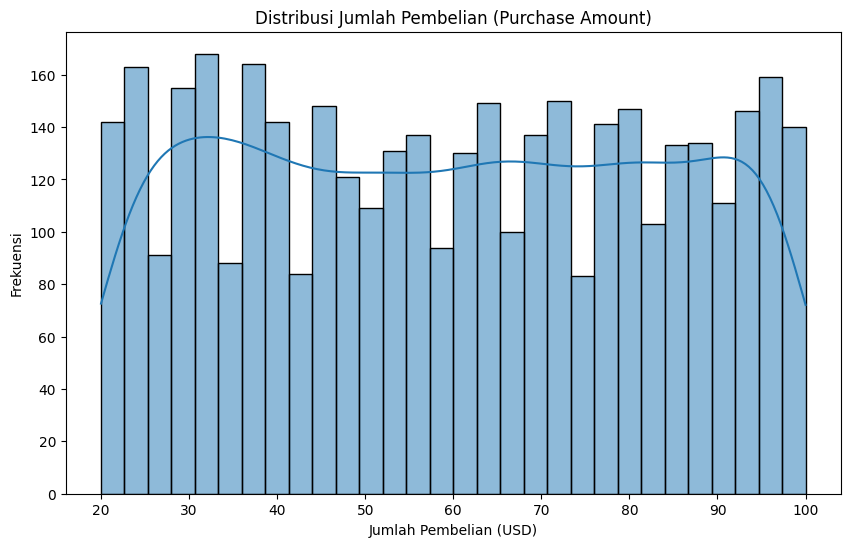

In [9]:
# Visualisasi distribusi variabel target 'Purchase Amount (USD)'
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase Amount (USD)'], kde=True, bins=30)
plt.title('Distribusi Jumlah Pembelian (Purchase Amount)')
plt.xlabel('Jumlah Pembelian (USD)')
plt.ylabel('Frekuensi')
plt.show()

In [12]:
# Visualisasi hubungan antara variabel kategorikal dan 'Purchase Amount (USD)'
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'Customer ID' in categorical_cols:
    categorical_cols.remove('Customer ID') # Hapus Customer ID jika ada



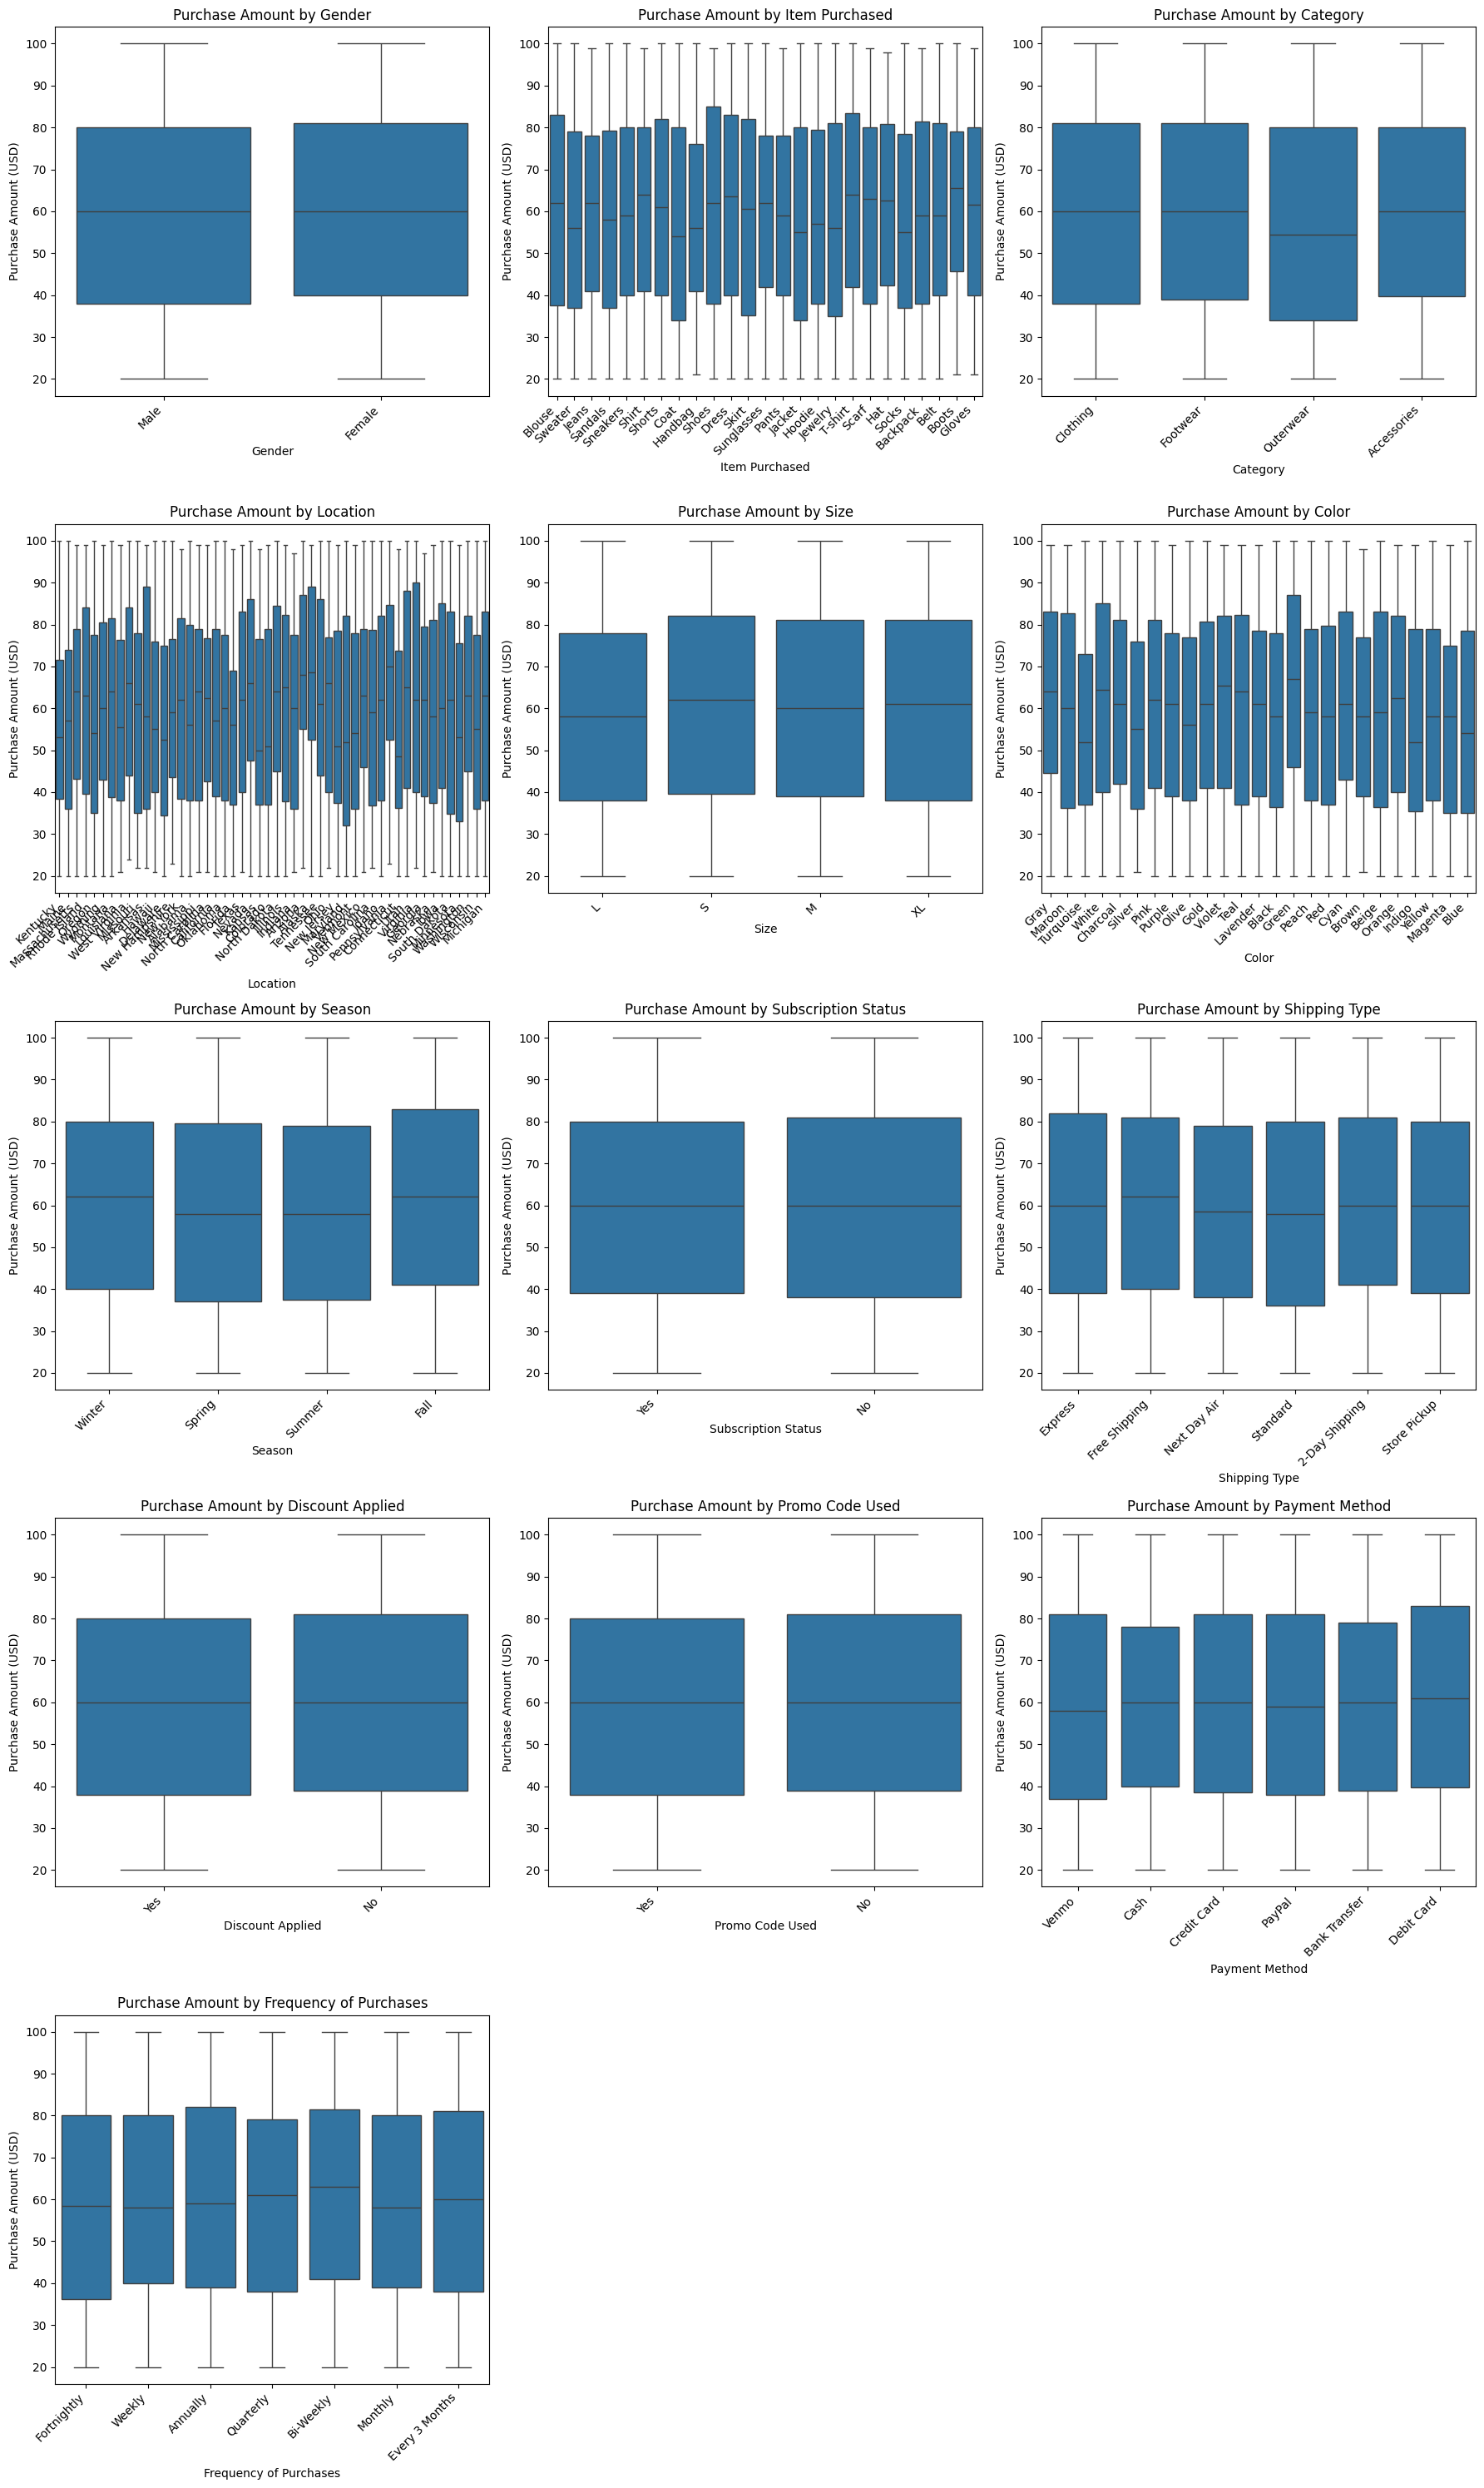

In [15]:
n_cols = len(categorical_cols)
n_rows = (n_cols + 2) // 3 # Calculate the number of rows needed

plt.figure(figsize=(18, n_rows * 6)) # Adjust figure size based on number of rows
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, 3, i + 1)
    sns.boxplot(x=col, y='Purchase Amount (USD)', data=df)
    plt.title(f'Purchase Amount by {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

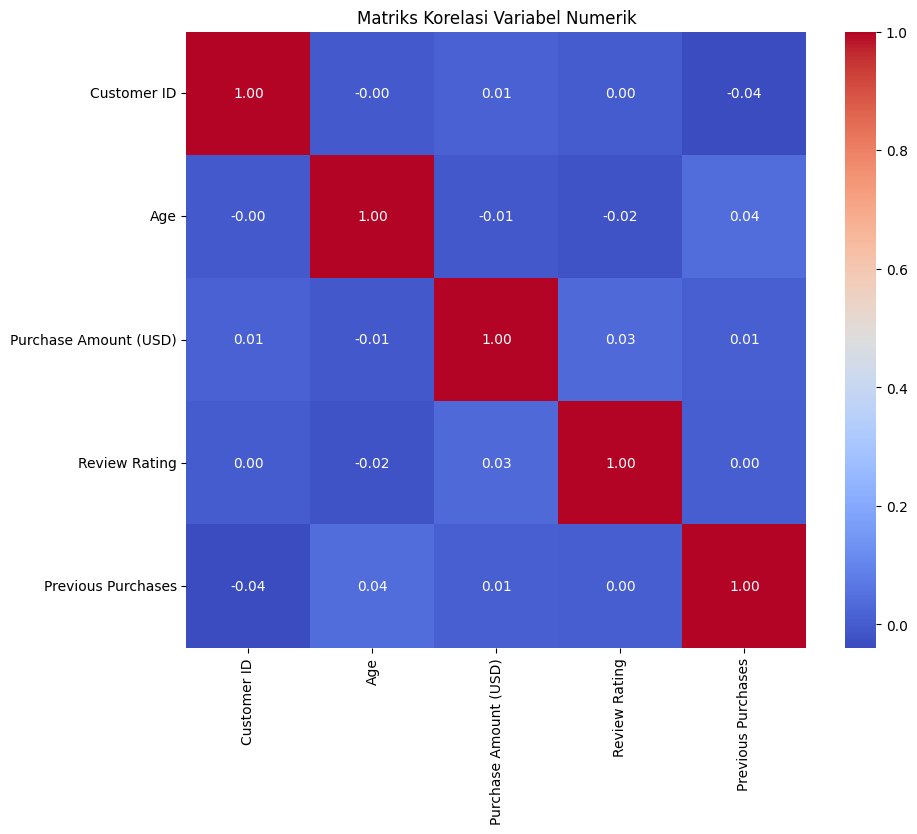

In [16]:
# Visualisasi korelasi antar variabel numerik (jika ada lebih dari satu)
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Matriks Korelasi Variabel Numerik')
    plt.show()

## **Pembersihan Data (Data Cleaning)**

In [17]:
# Menghapus kolom 'Customer ID' karena tidak relevan untuk pemodelan
if 'Customer ID' in df.columns:
    df = df.drop('Customer ID', axis=1)
    print("\nKolom 'Customer ID' telah dihapus.")


Kolom 'Customer ID' telah dihapus.


In [18]:
# Memeriksa dan menangani duplikat
print(f"\nJumlah baris duplikat sebelum dihapus: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Jumlah baris duplikat setelah dihapus: {df.duplicated().sum()}")


Jumlah baris duplikat sebelum dihapus: 0
Jumlah baris duplikat setelah dihapus: 0


In [19]:
# Mengganti nama kolom untuk kemudahan akses (opsional, tapi direkomendasikan)
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('__', '_').str.lower()
print("\nNama kolom telah diseragamkan:")
print(df.columns)


Nama kolom telah diseragamkan:
Index(['age', 'gender', 'item_purchased', 'category', 'purchase_amount_usd',
       'location', 'size', 'color', 'season', 'review_rating',
       'subscription_status', 'shipping_type', 'discount_applied',
       'promo_code_used', 'previous_purchases', 'payment_method',
       'frequency_of_purchases'],
      dtype='object')


In [20]:
# Memeriksa kembali nilai hilang setelah pembersihan awal
print("\nJumlah Nilai Hilang per Kolom setelah pembersihan awal:")
print(df.isnull().sum())


Jumlah Nilai Hilang per Kolom setelah pembersihan awal:
age                       0
gender                    0
item_purchased            0
category                  0
purchase_amount_usd       0
location                  0
size                      0
color                     0
season                    0
review_rating             0
subscription_status       0
shipping_type             0
discount_applied          0
promo_code_used           0
previous_purchases        0
payment_method            0
frequency_of_purchases    0
dtype: int64


## **Rekayasa Fitur (Feature Engineering)**

In [21]:
# Mengubah kolom 'Subscription Status' menjadi numerik (0/1)
df['subscription_status'] = df['subscription_status'].map({'Yes': 1, 'No': 0})
print("\nKolom 'subscription_status' telah diubah menjadi numerik.")

# Mengubah kolom 'Discount Applied' menjadi numerik (0/1)
df['discount_applied'] = df['discount_applied'].map({'Yes': 1, 'No': 0})
print("Kolom 'discount_applied' telah diubah menjadi numerik.")

# Mengubah kolom 'Promo Code Used' menjadi numerik (0/1)
df['promo_code_used'] = df['promo_code_used'].map({'Yes': 1, 'No': 0})
print("Kolom 'promo_code_used' telah diubah menjadi numerik.")


Kolom 'subscription_status' telah diubah menjadi numerik.
Kolom 'discount_applied' telah diubah menjadi numerik.
Kolom 'promo_code_used' telah diubah menjadi numerik.


### **NOTED**
1. Encoding variabel kategorikal lainnya menggunakan Label Encoding atau One-Hot Encoding
2. Untuk XGBoost, Label Encoding seringkali cukup baik untuk fitur dengan banyak kategori,
tetapi One-Hot Encoding lebih aman untuk menghindari asumsi ordinalitas.
3. Kita akan menggunakan One-Hot Encoding untuk sebagian besar, dan Label Encoding untuk yang spesifik jika diperlukan.

In [22]:
# Kolom yang akan di-One-Hot Encode
cols_to_onehot = ['gender', 'item_purchased', 'category', 'location', 'size', 'color', 'season', 'payment_method', 'frequency_of_purchases']

In [23]:
# Terapkan One-Hot Encoding
df = pd.get_dummies(df, columns=cols_to_onehot, drop_first=True) # drop_first=True untuk menghindari multicollinearity
print("\nVariabel kategorikal telah di-One-Hot Encode.")
print(f"Jumlah kolom setelah One-Hot Encoding: {df.shape[1]}")


Variabel kategorikal telah di-One-Hot Encode.
Jumlah kolom setelah One-Hot Encoding: 126


In [24]:
# Menampilkan 5 baris pertama data setelah feature engineering
print("\n--- 5 Baris Pertama Data Setelah Feature Engineering ---")
print(df.head())


--- 5 Baris Pertama Data Setelah Feature Engineering ---
   age  purchase_amount_usd  review_rating  subscription_status  \
0   55                   53            3.1                    1   
1   19                   64            3.1                    1   
2   50                   73            3.1                    1   
3   21                   90            3.5                    1   
4   45                   49            2.7                    1   

   shipping_type  discount_applied  promo_code_used  previous_purchases  \
0        Express                 1                1                  14   
1        Express                 1                1                   2   
2  Free Shipping                 1                1                  23   
3   Next Day Air                 1                1                  49   
4  Free Shipping                 1                1                  31   

   gender_Male  item_purchased_Belt  ...  payment_method_Credit Card  \
0         True  

## **Membagi Data menjadi set pelatihan (training set) dan set pengujian (testing set)**

In [25]:
# Mendefinisikan fitur (X) dan target (y)
X = df.drop('purchase_amount_usd', axis=1)
y = df['purchase_amount_usd']

In [26]:
# Membagi data menjadi training dan testing set
# random_state digunakan agar hasil pembagian konsisten setiap kali dijalankan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
print(f"\nUkuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran y_test: {y_test.shape}")


Ukuran X_train: (3120, 125)
Ukuran X_test: (780, 125)
Ukuran y_train: (3120,)
Ukuran y_test: (780,)


## **Pembangunan Model XGBoost**

In [28]:
# Inisialisasi model XGBoost Regressor
# Anda bisa menyesuaikan hyperparameter di sini
# Contoh hyperparameter umum: n_estimators, learning_rate, max_depth, subsample, colsample_bytree
xgb_model = XGBRegressor(objective='reg:squarederror', # Objective untuk regresi
                         n_estimators=100,             # Jumlah pohon
                         learning_rate=0.1,            # Tingkat pembelajaran
                         max_depth=5,                  # Kedalaman maksimum pohon
                         subsample=0.8,                # Proporsi sampel yang digunakan untuk melatih setiap pohon
                         colsample_bytree=0.8,         # Proporsi fitur yang digunakan untuk melatih setiap pohon
                         random_state=42,
                         n_jobs=-1)                    # Menggunakan semua core CPU yang tersedia
print("\nModel XGBoost diinisialisasi.")


Model XGBoost diinisialisasi.


In [30]:
# Melatih model
print("Melatih model XGBoost...")

# Apply Label Encoding to the 'shipping_type' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train['shipping_type'] = le.fit_transform(X_train['shipping_type'])
X_test['shipping_type'] = le.transform(X_test['shipping_type'])

xgb_model.fit(X_train, y_train)
print("Model XGBoost selesai dilatih.")

Melatih model XGBoost...
Model XGBoost selesai dilatih.


## **Evaluasi Model**

In [31]:
# Membuat prediksi pada set pengujian
y_pred = xgb_model.predict(X_test)

# Menghitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Metrik Evaluasi Model XGBoost ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


--- Metrik Evaluasi Model XGBoost ---
Mean Absolute Error (MAE): 21.09
Mean Squared Error (MSE): 586.27
Root Mean Squared Error (RMSE): 24.21
R-squared (R2): -0.05


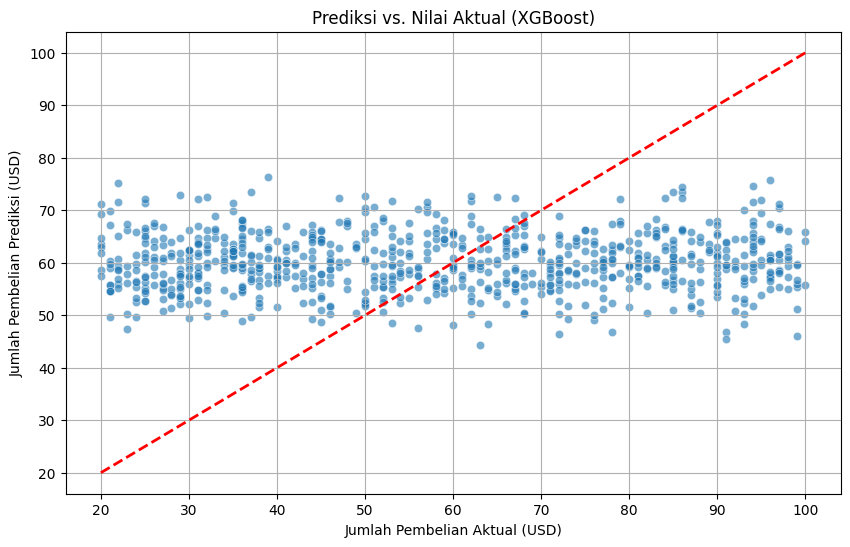

In [32]:
# Visualisasi hasil prediksi vs. nilai aktual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Garis y=x
plt.title('Prediksi vs. Nilai Aktual (XGBoost)')
plt.xlabel('Jumlah Pembelian Aktual (USD)')
plt.ylabel('Jumlah Pembelian Prediksi (USD)')
plt.grid(True)
plt.show()

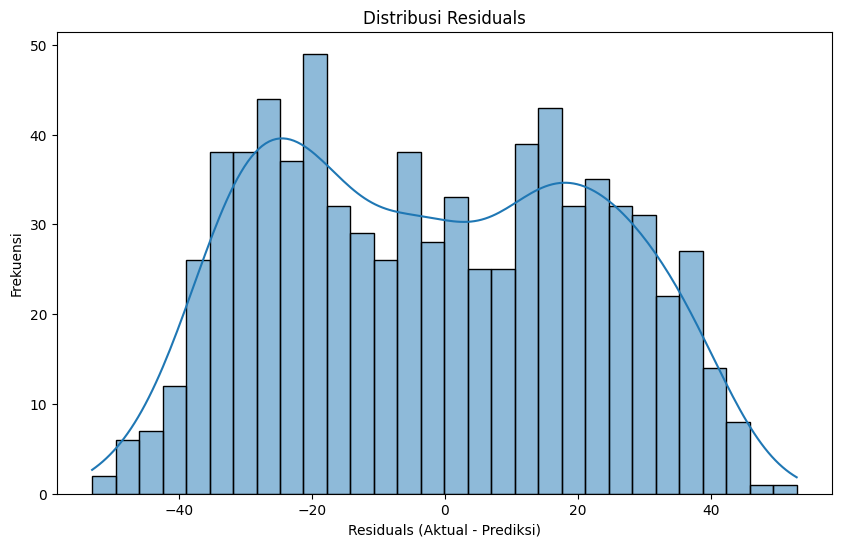

In [33]:
# Visualisasi residual
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribusi Residuals')
plt.xlabel('Residuals (Aktual - Prediksi)')
plt.ylabel('Frekuensi')
plt.show()

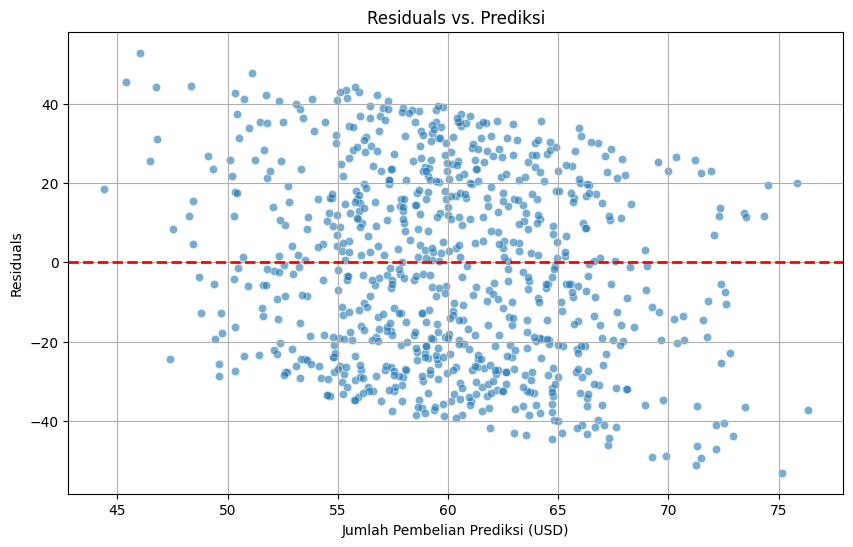

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residuals vs. Prediksi')
plt.xlabel('Jumlah Pembelian Prediksi (USD)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

## **Analisis Pentingnya Fitur (Feature Importance)**

In [35]:
# Mendapatkan pentingnya fitur dari model XGBoost
feature_importances = xgb_model.feature_importances_

# Membuat DataFrame untuk visualisasi
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)
print("\n--- Pentingnya Fitur (Top 10) ---")
print(features_df.head(10))


--- Pentingnya Fitur (Top 10) ---
                   Feature  Importance
48           location_Iowa    0.021020
75      location_Tennessee    0.012332
117  payment_method_PayPal    0.011145
9    item_purchased_Blouse    0.011109
61         location_Nevada    0.010929
68           location_Ohio    0.010766
37       location_Arkansas    0.010736
78        location_Vermont    0.010596
12    item_purchased_Dress    0.010088
74   location_South Dakota    0.009988


/tmp/ipython-input-3953936934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df.head(15), palette='viridis')


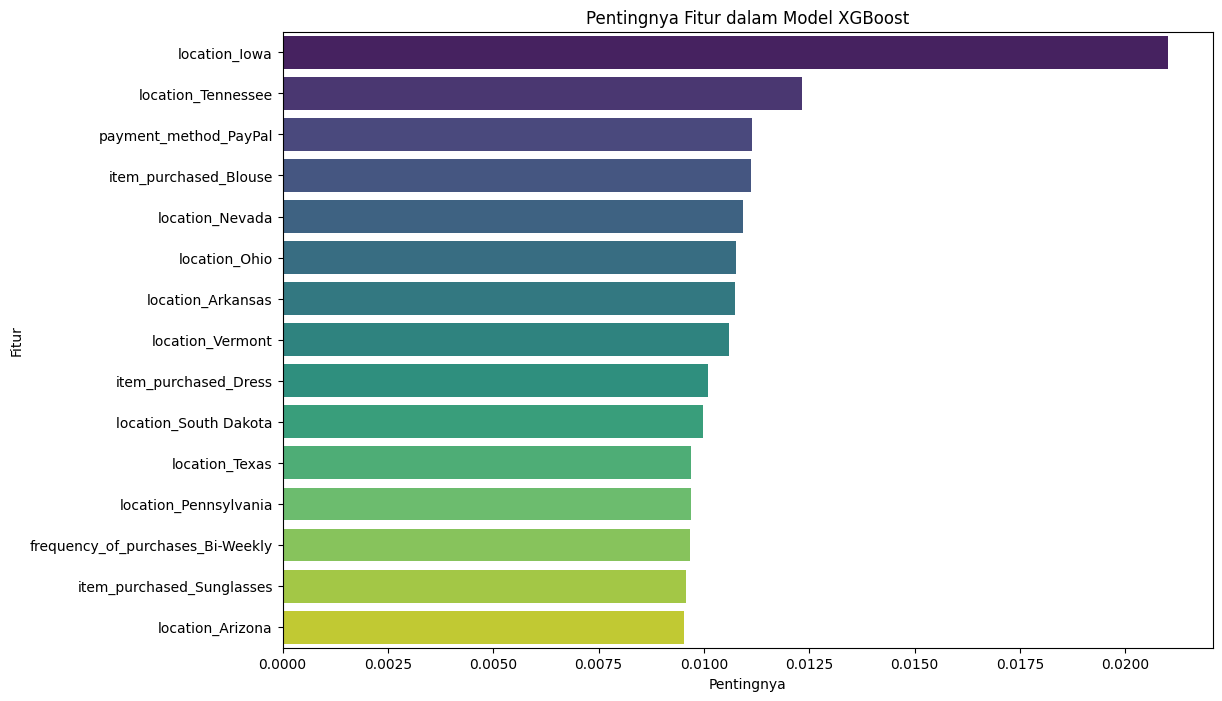

In [36]:
# Visualisasi pentingnya fitur
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df.head(15), palette='viridis')
plt.title('Pentingnya Fitur dalam Model XGBoost')
plt.xlabel('Pentingnya')
plt.ylabel('Fitur')
plt.show()

## **Kesimpulan dan Langkah Selanjutnya**

In [38]:
print("\n--- Kesimpulan ---")
print("Model XGBoost telah dilatih untuk memprediksi 'Purchase Amount (USD)'.")
print(f"Kinerja model (R-squared) adalah {r2:.2f}, yang menunjukkan bahwa {r2*100:.2f}% variabilitas dalam jumlah pembelian dapat dijelaskan oleh fitur-fitur dalam model.")
print("Fitur-fitur penting telah diidentifikasi, memberikan wawasan tentang faktor-faktor yang paling memengaruhi jumlah pembelian.")

print("\n--- Langkah Selanjutnya yang Disarankan ---")
print("1. **Tuning Hyperparameter:** Gunakan teknik seperti GridSearchCV atau RandomizedSearchCV untuk menemukan kombinasi hyperparameter terbaik yang dapat meningkatkan kinerja model lebih lanjut.")
print("2. **Validasi Silang:** Terapkan validasi silang (Cross-Validation) untuk mendapatkan estimasi kinerja model yang lebih robust dan mengurangi risiko overfitting.")
print("3. **Analisis Residual Lebih Lanjut:** Jika distribusi residual tidak normal atau menunjukkan pola, mungkin ada informasi yang belum ditangkap oleh model.")
print("4. **Eksplorasi Fitur Tambahan:** Pertimbangkan untuk membuat fitur rekayasa yang lebih kompleks atau mengintegrasikan sumber data eksternal jika tersedia.")
print("5. **Interpretasi Model:** Gunakan alat seperti SHAP (SHapley Additive exPlanations) untuk interpretasi model yang lebih mendalam, terutama untuk memahami bagaimana setiap fitur memengaruhi prediksi individu.")
print("6. **Deployment:** Jika kinerja sudah memuaskan, model dapat dipertimbangkan untuk deployment.")


--- Kesimpulan ---
Model XGBoost telah dilatih untuk memprediksi 'Purchase Amount (USD)'.
Kinerja model (R-squared) adalah -0.05, yang menunjukkan bahwa -4.77% variabilitas dalam jumlah pembelian dapat dijelaskan oleh fitur-fitur dalam model.
Fitur-fitur penting telah diidentifikasi, memberikan wawasan tentang faktor-faktor yang paling memengaruhi jumlah pembelian.

--- Langkah Selanjutnya yang Disarankan ---
1. **Tuning Hyperparameter:** Gunakan teknik seperti GridSearchCV atau RandomizedSearchCV untuk menemukan kombinasi hyperparameter terbaik yang dapat meningkatkan kinerja model lebih lanjut.
2. **Validasi Silang:** Terapkan validasi silang (Cross-Validation) untuk mendapatkan estimasi kinerja model yang lebih robust dan mengurangi risiko overfitting.
3. **Analisis Residual Lebih Lanjut:** Jika distribusi residual tidak normal atau menunjukkan pola, mungkin ada informasi yang belum ditangkap oleh model.
4. **Eksplorasi Fitur Tambahan:** Pertimbangkan untuk membuat fitur rekayasa y